# Praca Domowa - ML
1. [Zadanie 1](#ZADANIE-1) ✓ 
1. [Zadanie 2](#ZADANIE-2) ✓ 
1. [Zadanie 3](#ZADANIE-3) ✓
1. [Zadanie 4](#ZADANIE-4) ✓ 

In [1]:
# Może być konieczne zainstalowanie:
# !pip install xgboost
# !pip install yellowbrick
# !pip install imblearn 

# (dla imblrean sklearn nie może być w wersji 1.3 - najlepiej mieć w 1.2.2)

### Biblioteki

In [2]:
# Podstawowe
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Do obróbki danych
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

# Do ML
import xgboost as xgb
import sklearn.svm as svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Do wizualizacji
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from yellowbrick.cluster import SilhouetteVisualizer

#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

# ZADANIE 1

Zadanie nr 1 25pkt.

Na podstawie danych zawartych w zbiorze https://www.kaggle.com/uciml/pima-indians-diabetes-database

Przygotuj:

A. Przegląd danych w zbiorze

1. head
2. info
3. shape
4. describe
5. value_counts

B. Udział poszczególnych kategorii

1. Pudełko
2. Histogram

C. Braki danych w zbiorze

D. Korelacja

E. Feature Engineering

1. Stworzenie zmiennych 0-1 dla zmiennych kategorycznych
2. Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

F. Przygotowanie zbioru do modelowania

1. Podział zbioru na treningowy i testowy
2. Analiza głównych składowych

E. Model klasyfikacyjny

1. Użyj wybranego modelu klasyfikacyjnego znanego Ci z zajęć. Wyestymuj dwa modele - jeden na wystandaryzowanych danych, a drugi na PCA.

F. Ocena modelu klasyfikacyjnego

1. Wyznacz accuracy, precision, lub inne miary znane Ci z zajęć, które uznasz za stosowne. Porównaj wyniki dla obydwu modeli na odpowiednich zbiorach (Dane wystandaryzowane, dane PCA)

In [3]:
# Wczytanie danych
diabetes_df = pd.read_csv("diabetes.csv")

In [4]:
# A. Przegląd danych w zbiorze

# 1. head
display(md("### Wywołanie metody head()"))
display(diabetes_df.head())

# 2. info
display(md("### Wywołanie metody info()"))
display(diabetes_df.info())

# 3. shape
display(md("### Wywołanie metody shape"))
display(diabetes_df.shape)

# 4. describe
display(md("### Wywołanie metody describe()"))
display(diabetes_df.describe())

# 5. value_counts
display(md("### Wywołanie metody value_counts()"))
display(diabetes_df.value_counts())

### Wywołanie metody head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Wywołanie metody info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

### Wywołanie metody shape

(768, 9)

### Wywołanie metody describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


### Wywołanie metody value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.70  0.73                      67   0          1
             67       76             0              0        45.30  0.19                      46   0          1
5            103      108            37             0        39.20  0.30                      65   0          1
             104      74             0              0        28.80  0.15                      48   0          1
             105      72             29             325      36.90  0.16                      28   0          1
                                                                                                             ..
2            84       50             23             76       30.40  0.97                      21   0          1
             85       65             0              0        39.60  0.93                      27   0         

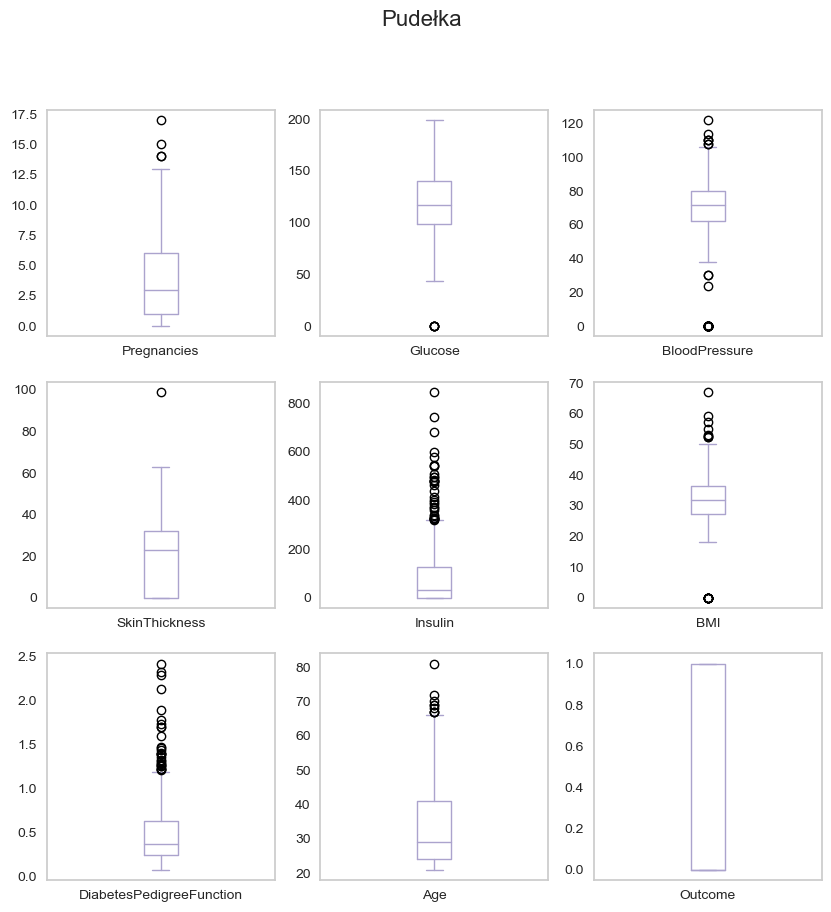

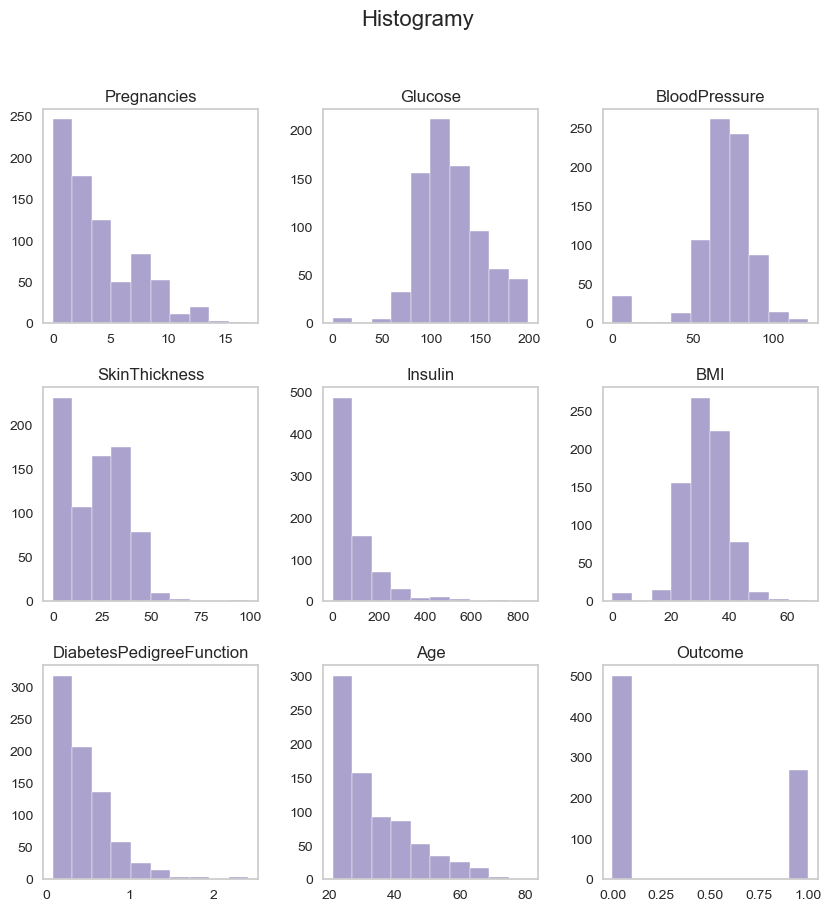

In [5]:
# 2. B. Udział poszczególnych kategorii

sns.set_style("whitegrid")

# 1. Pudełko
fig1, axis1 = plt.subplots(3, 3, figsize = (10,10))
fig1.suptitle("Pudełka", fontsize = 16)
for ax, column in enumerate(diabetes_df):
    diabetes_df.boxplot(column = column, grid = False, color = '#aba3cd', ax = axis1.ravel()[ax])
plt.show()

# 2. Histogram
fig2, axis2 = plt.subplots(3, 3, figsize = (10,10))
fig2.suptitle("Histogramy", fontsize = 16)
diabetes_df.hist(grid = False, ax = axis2, color = '#aba3cd')
plt.show()

In [6]:
# C. Braki danych w zbiorze

# Suma wartości nullowych
display(md("### Braki danych w zbiorze"))
display(diabetes_df.isnull().sum())

# Pomimo że nie ma wartości NaN w zbiorze, patrząc na wykresy i metodę describe() widać że zbiór ma braki. 
# Dla kolumn 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' wartości zerowe nie mają sensu, dlatego
# są one brakującymi danymi. Aby ułatwić analizę konieczna jest zmiana ich na NaN.

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

diabetes_df_nan = diabetes_df.copy(deep = True)
diabetes_df_nan[columns] = diabetes_df[columns].replace(0, np.NaN)

# Suma wartości nullowych
display(md("### Braki danych po zmianie 0.0 na NaN"))
display(diabetes_df_nan.isnull().sum())

# --- Uzupełnienie brakujących danych ---

#Przypisanie kolumn
missing =  ['SkinThickness', 'Insulin']
predictor = ['BMI', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']

# Interpolacja braków o małej liczbie
diabetes_df_new = diabetes_df_nan.copy()
diabetes_df_new[['Glucose', 'BloodPressure', 'BMI']] = diabetes_df_new[['Glucose', 'BloodPressure', 'BMI']].interpolate()

#Dopasowanie modelu regresji
imputer = IterativeImputer(estimator = BayesianRidge())

#Uzupełnienie brakujących wartości wygenerowanymi
imputed_data = imputer.fit_transform(diabetes_df_new[predictor + missing])[:, -2:]
imputed_data = pd.DataFrame(imputed_data)

#Zamienienie NaN na wygenerowane wartości
diabetes_df_new[missing] = imputed_data

# Suma wartości nullowych po obróbce
display(md("### Braki danych po uzupełnieniu"))
display(diabetes_df_new.isnull().sum())

### Braki danych w zbiorze

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Braki danych po zmianie 0.0 na NaN

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Braki danych po uzupełnieniu

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Tabela korelacji dla wszystkich kolumn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.20,0.10,0.08,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.24,0.70,0.23,0.14,0.27,0.49
BloodPressure,0.20,0.22,1.00,0.23,0.13,0.27,-0.01,0.32,0.16
SkinThickness,0.10,0.24,0.23,1.00,0.25,0.70,0.12,0.16,0.28
Insulin,0.08,0.70,0.13,0.25,1.00,0.27,0.14,0.21,0.36
BMI,0.02,0.23,0.27,0.70,0.27,1.00,0.16,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.01,0.12,0.14,0.16,1.00,0.03,0.17
Age,0.54,0.27,0.32,0.16,0.21,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.16,0.28,0.36,0.31,0.17,0.24,1.00


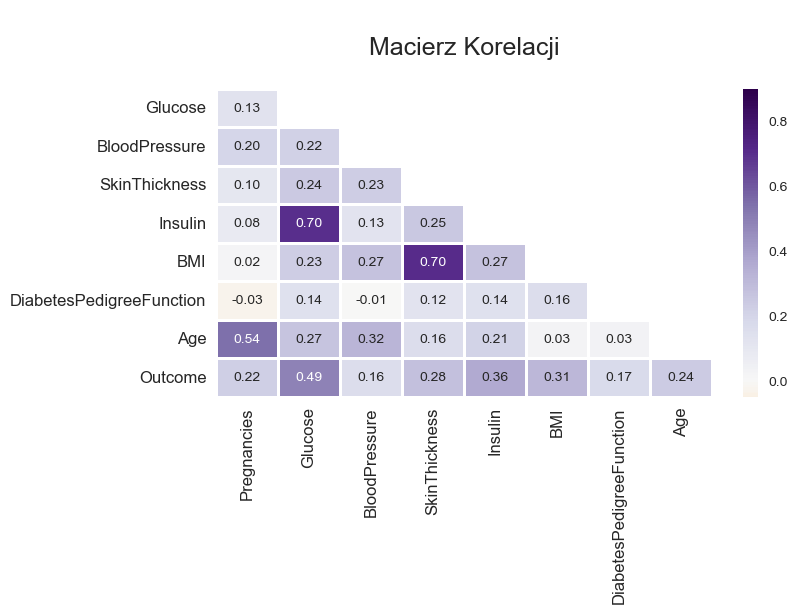

In [7]:
# D. Korelacja

# Obliczenie korelacji
corr = diabetes_df_new.corr(numeric_only = True)
display(md("### Tabela korelacji dla wszystkich kolumn"))
display(corr)

# Wizualizacja korelacji za pomocą heatmapy
sns.set_style("white")
fig, ax = plt.subplots(figsize = (8, 4))   

mask = np.triu(np.ones_like(diabetes_df_new.corr(numeric_only = True), dtype = bool))[1:, :-1]
corr = diabetes_df_new.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask = mask, vmin = -0.05, vmax = 0.9, center = 0, annot = True, fmt = '.2f', 
                 cmap = 'PuOr', linewidths = 1, annot_kws = {"fontsize": 10})

ax.set_title('\nMacierz Korelacji\n', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)
plt.show()

In [8]:
# E. Feature Engineering

# 1. Stworzenie zmiennych 0-1 dla zmiennych kategorycznych 

# W zbiorze zmienne kategoryczne już są zapisane w formacie 0-1    

# 2. Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

# Podział na X i y
X = diabetes_df_new.drop(['Outcome'], axis = 1)
y = diabetes_df_new['Outcome']

In [9]:
# F. Przygotowanie zbioru do modelowania

# 1. Podział zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 2. Analiza głównych składowych
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
# E. Model klasyfikacyjny

# Użyj wybranego modelu klasyfikacyjnego znanego Ci z zajęć. 
# Wyestymuj dwa modele - jeden na wystandaryzowanych danych, a drugi na PCA.

#Przykładowe parametry uczenia modelu
param = {'learning_rate': 0.1, 'gamma': 1.5, 'objective': 'binary:logistic', 
         'n_estimators': 20, 'max_depth': 10, 'max_leaves': 100 }

#Stworzenie modeli
model1 = xgb.XGBClassifier(**param).fit(X_train_scaled, y_train)
model2 = xgb.XGBClassifier(**param).fit(X_train_pca, y_train)

#Estymacja etykiet
y_test_pred1 = model1.predict(X_test_scaled)
y_train_pred1 = model1.predict(X_train_scaled)

y_test_pred2 = model2.predict(X_test_pca)
y_train_pred2 = model2.predict(X_train_pca)

### Raport klasyfikacyjny dla Modelu 1

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        96
           1       0.73      0.69      0.71        58

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.78      0.79      0.78       154



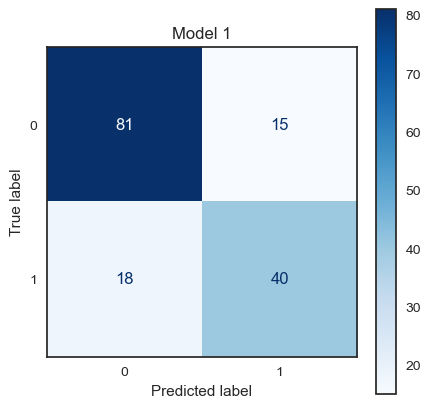

### Raport klasyfikacyjny dla Modelu 2

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        96
           1       0.69      0.59      0.64        58

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



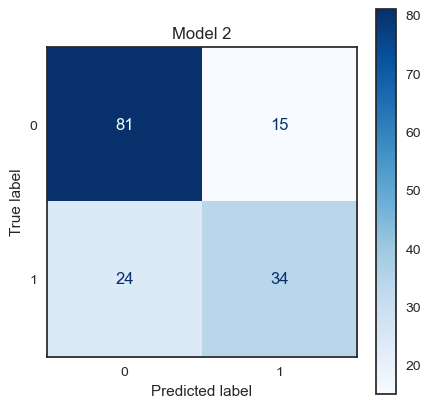

In [11]:
# F. Ocena modelu klasyfikacyjnego

# Wyznacz accuracy, precision, lub inne miary znane Ci z zajęć, które uznasz za stosowne. 
# Porównaj wyniki dla obydwu modeli na odpowiednich zbiorach (Dane wystandaryzowane, dane PCA).

sns.set_style("white")

# Raport klasyfikacyny model 1
display(md("### Raport klasyfikacyjny dla Modelu 1"))
print(classification_report(y_test,y_test_pred1))

# Macierz pomyłek model 1
fig, ax = plt.subplots(figsize = (5, 5))
cm1 = confusion_matrix(y_test, y_test_pred1)
matrix1 = ConfusionMatrixDisplay(confusion_matrix = cm1)
matrix1.plot(cmap = 'Blues', ax = ax)
plt.title("Model 1")
plt.show()

# Raport klasyfikacyny model 2
display(md("### Raport klasyfikacyjny dla Modelu 2"))
print(classification_report(y_test,y_test_pred2))

# Macierz pomyłek model 2
fig, ax = plt.subplots(figsize = (5, 5))
cm2 = confusion_matrix(y_test, y_test_pred2)
matrix2 = ConfusionMatrixDisplay(confusion_matrix = cm2)
matrix2.plot(cmap = 'Blues', ax = ax)
plt.title("Model 2")
plt.show()

# ZADANIE 2

Zadanie nr 2 25pkt.
Poniżej podany jest zestaw danych (heart.csv). Zawiera on brakujące wartości. Twoim zadaniem jest przygotować ten zestaw danych do obróbki a następnie wytrenować klasyfikator przewidujący choroby serca dobierając ilość kroków oraz learning rate.

Wartością docelową jest num

Twoim celem jest odrzucenie zmiennych charakteryzujących się dużą ilością wartości brakujących oraz uzupełnienie pozostałych kolumn. Użyj do tego na przykład funkcji pd.DataFrame.isna, pd.DataFrame.sum oraz metody pd.Series.fillna.

Użyj metody xgb.cv do ustalenia przebiegu treningu. Postaraj się dobrać takie wartości ilości kroków oraz learning rate aby uniknąć przeuczenia (overfitu) w końcowym modelu. Zacznij od learning rate 0.01. Kiedy klasyfikator zostanie przetrenowany, użyj wykresu błędu w zależności od ilości kroków aby wyznaczyć przybliżoną optymalną ilość drzew dla danego modelu i wytrenuj ostateczny model.

Dodatkowe info: xgb obsługuje brakujące wartości przez parametr missing. Możesz (nie musisz) użyć tego zamiast interpolacji brakujących wartości.

In [12]:
# --- Podgląd danych ---

# Wgranie zbioru
heart_df = pd.read_csv('heart.csv', na_values='?')

# Podgląd danych
display(md("### Podgląd danych"))
display(heart_df.head(5))

# Wywołanie metody describe()
display(md("### Opis danych"))
display(heart_df.describe())

# Sprawdzenie brakujących wartości
display(md("### Suma wartości NaN dla każdej kategorii"))
display(heart_df.isna().sum())

### Podgląd danych

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.00,132.00,0.00,2.00,185.00,0.00,0.00,NaN,NaN,NaN,0
1,29,1,2,120.00,243.00,0.00,0.00,160.00,0.00,0.00,NaN,NaN,NaN,0
2,29,1,2,140.00,NaN,0.00,0.00,170.00,0.00,0.00,NaN,NaN,NaN,0
3,30,0,1,170.00,237.00,0.00,1.00,170.00,0.00,0.00,NaN,NaN,6.00,0
4,31,0,2,100.00,219.00,0.00,1.00,150.00,0.00,0.00,NaN,NaN,NaN,0


### Opis danych

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.00,294.00,294.00,293.00,271.00,286.00,293.00,293.00,293.00,294.00,104.00,3.00,28.00,294.00
mean,47.83,0.72,2.98,132.58,250.85,0.07,0.22,139.13,0.30,0.59,1.89,0.00,5.64,0.36
std,7.81,0.45,0.97,17.63,67.66,0.26,0.46,23.59,0.46,0.91,0.34,0.00,1.62,0.48
min,28.00,0.00,1.00,92.00,85.00,0.00,0.00,82.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,42.00,0.00,2.00,120.00,209.00,0.00,0.00,122.00,0.00,0.00,2.00,0.00,5.25,0.00
50%,49.00,1.00,3.00,130.00,243.00,0.00,0.00,140.00,0.00,0.00,2.00,0.00,6.00,0.00
75%,54.00,1.00,4.00,140.00,282.50,0.00,0.00,155.00,1.00,1.00,2.00,0.00,7.00,1.00
max,66.00,1.00,4.00,200.00,603.00,1.00,2.00,190.00,1.00,5.00,3.00,0.00,7.00,1.00


### Suma wartości NaN dla każdej kategorii

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [13]:
# --- Przygotowanie danych ---

# Kolumny 'ca' i 'thal' posiadają minimalną ilość rekordów, a kolumna 'slope' tylko 1/3 rekordów.
# Podjełam decyzje o ich usunięciu. 
heart_df_new = heart_df.drop(['ca', 'thal', 'slope'], axis = 1)

# Uzupełnienie brakujących danych o małej liczbie interpolacją.
columns = heart_df_new.columns[heart_df_new.isna().any() == True]
heart_df_new[columns] = heart_df_new[columns].interpolate()

# Wybranie zbiorów (kolumna 'num' ma dziwnie wydłużoną nazwę z pustym miejscem?)
X = heart_df_new.drop(['num       '], axis = 1)
y = heart_df_new['num       ']

# Podział zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
# --- Wybranie hiperparametów ---

# Dobranie najlepszych hiperpaametrów modelu za pomocą GridSearchCV
parameters = {'learning_rate': [0.01, 0.05, 0.1, 0.5, 1], 
              'gamma': [0.001, 0.01, 0.1, 1, 2], 
              'n_estimators': [10, 20, 30, 50, 100], 
              'max_depth': [1, 2, 4, 6],
              'max_leaves': [10, 50, 100, 200]} 

#Przypisanie metryk oceny modelu
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ['error']

grid_search = GridSearchCV(xgb.XGBClassifier(objective = 'binary:logistic', eval_metric = eval_metric),
                           param_grid = parameters,
                           scoring = 'accuracy')

grid_search.fit(X_train, y_train)

# Stworzenie modelu z najlepszymi hiperparametrami
model_xgb = grid_search.best_estimator_

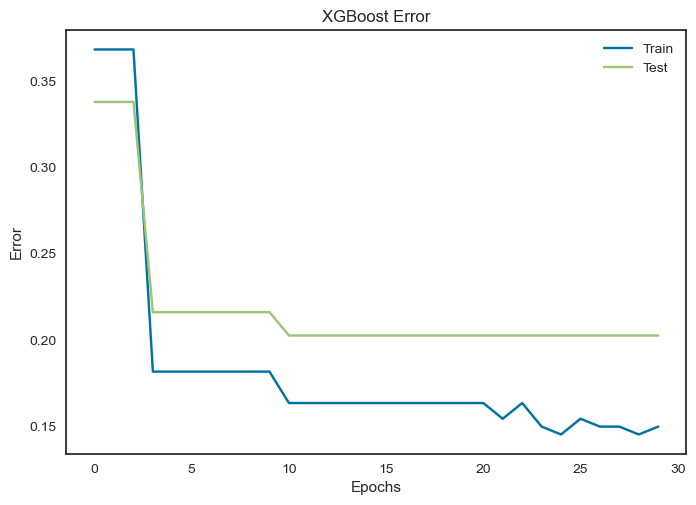

In [15]:
# --- Klasyfikacja --- 

# Wytrenowanie modelu 
model_xgb.fit(X_train, y_train, eval_set = eval_set, verbose = False)

# Wyznaczenie wartości metryk w trakcie uczenia modelu
results = model_xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Wykres błędu (metryka error dla kolejnych drzew)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label = "Train")
ax.plot(x_axis, results['validation_1']['error'], label = "Test")
ax.legend()
plt.ylabel("Error")
plt.xlabel("Epochs")
plt.title("XGBoost Error")
plt.show()

### Raport klasyfikacyjny dla Modelu xgBoost

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        49
           1       0.78      0.56      0.65        25

    accuracy                           0.80        74
   macro avg       0.79      0.74      0.75        74
weighted avg       0.79      0.80      0.79        74



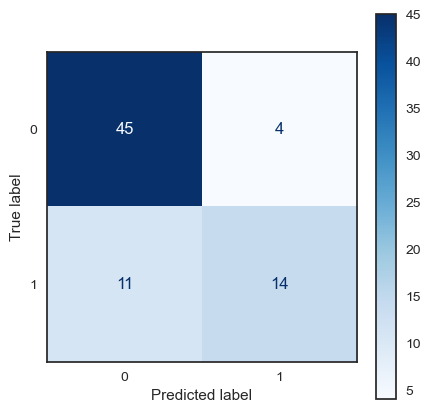

In [16]:
# --- Wizualizacja wyników --- 

# Wyznaczenie prawdopodobieństwa etykiet przy użyciu modelu
y_pred = model_xgb.predict(X_test)

# Zmiana prawdopodobieństwa na etykiety
y_pred = np.where(y_pred > 0.5, 1, 0)

sns.set_style("white")

# Raport klasyfikacyny
display(md("### Raport klasyfikacyjny dla Modelu xgBoost"))
print(classification_report(y_test, y_pred))

# Macierz pomyłek
fig, ax = plt.subplots(figsize = (5, 5))
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm)
matrix.plot(cmap = 'Blues', ax = ax)
plt.show()

# ZADANIE 3

Zadanie nr 3 25pkt.

Na podstawie danych zawartych w zbiorze https://www.kaggle.com/mlg-ulb/creditcardfraud dotyczącym wyłudzeń transakcji kartowych, stwórz model SVM oraz lasu losowego, który szacować będzie ryzyko wyłudzenia.

W zadaniu muszą pojawić się co najmniej takie punkty jak:

Podział zbioru na treningowy i testowy
Ocena jakości każdego z modeli oraz wybór lepszego z nich.
Wybór poziomu cut-off, który pozwoli na jak najlepsze wykrywanie fraud'ów (Zastanów się, co jest dla Ciebie gorszą sytuacją błędne przypisanie frauda zwykłej transakcji czy uznanie zwykłej transakcji za fradu). Uargumnetuj swój wybór.
Zadania dodatkowe (ekstra punkty!):

Wydziel również zbiór walidacyjny, na którym sprawdzisz czy wybrany, ostateczny model zachowuje jakość.
Fraud jest zdarzeniem rzadkim. Istnieją metody, które pozwalają na lepsze rozpoznanie tego typu zjawisk, mogą to być na przykład oversampling lub undersampling. Użyj jednej z tych metod.
Uwagi:

Zbiór cech jest wynikiem analizy głównych składowych (ang. PCA) - metody zmniejszającej wymiarowość (liczbę cech objaśniających). Możecie znaleźć wiele ciekawych materiałów na ten temat w internecie. W powyższym zadaniu nie ma jednak konieczności poznawania szczegółów tej metody. Dla celów naukowych, możecie sprawdzić średnią i odchylenie standardowe każdej ze zmiennych.

In [17]:
# --- Podgląd danych ---

# Wgranie zbioru
credit_df = pd.read_csv('creditcard.csv')

# Podgląd danych
display(md('### Podgląd danych'))
display(credit_df.head(5))

# Wywołanie metody describe()
display(md('### Opis danych'))
display(credit_df.describe())

# Sprawdzenie brakujących wartości
display(md('### Czy w zbiorze brakuje wartości?'))
display(credit_df.isna().sum().any())

# Liczebność klas w zbiorze
display(md('### Liczebność klas w zbiorze'))
print('Nie zaszło wyłudzenie: {}'.format(credit_df['Class'].value_counts()[0]))
print('Zaszło wyłudzenie: {}'.format(credit_df['Class'].value_counts()[1]))

### Podgląd danych

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### Opis danych

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


### Czy w zbiorze brakuje wartości?

False

### Liczebność klas w zbiorze

Nie zaszło wyłudzenie: 284315
Zaszło wyłudzenie: 492


In [18]:
# --- Przygotowanie danych ---

# Większość danych w zbiorze to zbiór cech po transformacji PCA - są one już wystandaryzowane. Wyjątek stanowią
# kolumny Amount i Time, dla których konieczne jest przeprowadzenie standaryzacji.

scaler = StandardScaler()
credit_df['Amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1, 1))
credit_df['Time'] = scaler.fit_transform(credit_df['Time'].values.reshape(-1, 1))

# Po przejrzeniu danych najbardziej istotną cechą zbioru jest jego niezrównoważenie. Dlatego podzieliłam zbiór, a na 
# treningowym przeprowadziłam Random Undersampling w celu zmniejszenia liczby etykiet gdzie nie zaszło wyłudzenie. 

# Przypisanie zmiennych
X = credit_df.drop('Class', axis = 1)
y = credit_df['Class']

# Zastosowana w zadaniu metoda GridSearchCV sama wyznacza zbiór walidacyjny ze zbioru treningowego 
# do przeporwadzenia walidacji krzyżowej, niemniej i tak wydzieliłam osobny zbiór walidacyjny do sprawdzenia jakości modeli.

# Podział zbioru 
X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.8, random_state = 123) # wydzielenie treningowego              
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.5, random_state = 123) # wydzielenie testowego i walidacyjnego

# Random Undersampling
undersample = RandomUnderSampler(sampling_strategy = 'majority')
X_train_u, y_train_u = undersample.fit_resample(X_train, y_train)

display(md('### Liczebność klas w zbiorze treningowym po obróbce'))
print('Nie zaszło wyłudzenie: {}'.format(y_train_u.value_counts()[0]))
print('Zaszło wyłudzenie: {}'.format(y_train_u.value_counts()[1]))

### Liczebność klas w zbiorze treningowym po obróbce

Nie zaszło wyłudzenie: 83
Zaszło wyłudzenie: 83


In [19]:
# --- Dobranie parametrów SVM ---

# przypisanie parametrów do GridSearch
param1 = {'kernel': ('linear', 'rbf','sigmoid'),
          'gamma': ('scale', 'auto', 1/2),
          'coef0': np.linspace(0, 3, 12),
          'C': 10 ** np.linspace(-5, 5, 11)}

grid_search_svm = GridSearchCV(svm.SVC(),
                               param_grid = param1)

grid_search_svm.fit(X_train_u, y_train_u)

# Sprawdzenie jakości na zbiorze walidacyjnym
print('Jakość na zbiorze walidacyjnym: {}'.format(grid_search_svm.score(X_val, y_val)))

Jakość na zbiorze walidacyjnym: 0.9673112540926766


In [20]:
# --- Dobranie parametrów Random Forest ---

# przypisanie parametrów do GridSearch
param2 = {'bootstrap': [True],
          'max_depth': [3, None],
          'max_features': [2, 3],
          'min_samples_leaf': [3, 4, 5],
          'n_estimators': [10, 50, 100, 200]}

grid_search_forest = GridSearchCV(RandomForestClassifier(), 
                                  param_grid = param2, 
                                  cv = 3,  
                                  verbose = 0)

grid_search_forest.fit(X_train_u, y_train_u)

# Sprawdzenie jakości na zbiorze walidacyjnym
print('Jakość na zbiorze walidacyjnym: {}'.format(grid_search_forest.score(X_val, y_val)))

Jakość na zbiorze walidacyjnym: 0.9670128068958859


In [21]:
# --- Klasyfikacja ---

model_svm = grid_search_svm.best_estimator_
model_forest = grid_search_forest.best_estimator_

model_svm.fit(X_train_u, y_train_u)
model_forest.fit(X_train_u, y_train_u)

RandomForestClassifier(max_features=3, min_samples_leaf=5, n_estimators=10)

### Raport klasyfikacyjny dla Modelu SVM

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    113717
           1       0.05      0.92      0.09       206

    accuracy                           0.97    113923
   macro avg       0.52      0.94      0.54    113923
weighted avg       1.00      0.97      0.98    113923



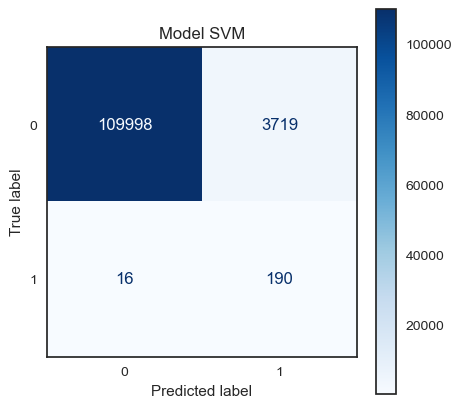

### Raport klasyfikacyjny dla Modelu RandomTree

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    113717
           1       0.06      0.89      0.11       206

    accuracy                           0.97    113923
   macro avg       0.53      0.93      0.55    113923
weighted avg       1.00      0.97      0.99    113923



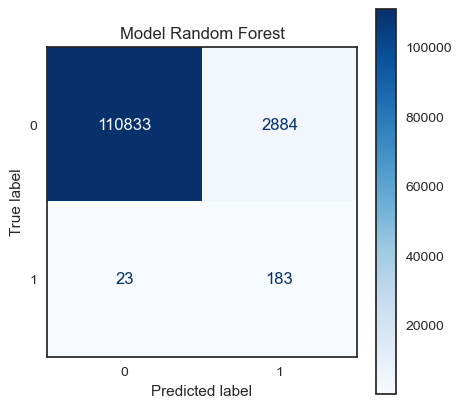

In [22]:
# --- Wizualizacja wyników --- 

# Wyznaczenie etykiet przy użyciu modelów
y_pred_svm = model_svm.predict(X_test)
y_pred_forest = model_forest.predict(X_test)

sns.set_style('white')

# Raport klasyfikacyny model SVM
display(md('### Raport klasyfikacyjny dla Modelu SVM'))
print(classification_report(y_test, y_pred_svm))

# Macierz pomyłek model SVM
fig, ax = plt.subplots(figsize = (5, 5))
cm1 = confusion_matrix(y_test, y_pred_svm)
matrix1 = ConfusionMatrixDisplay(confusion_matrix = cm1)
matrix1.plot(cmap = 'Blues', ax = ax)
plt.title("Model SVM")
plt.show()

# Raport klasyfikacyny model Random Forest
display(md('### Raport klasyfikacyjny dla Modelu RandomTree'))
print(classification_report(y_test, y_pred_forest))

# Macierz pomyłek model Random Forest
fig, ax = plt.subplots(figsize = (5, 5))
cm2 = confusion_matrix(y_test, y_pred_forest)
matrix2 = ConfusionMatrixDisplay(confusion_matrix = cm2)
matrix2.plot(cmap = 'Blues', ax = ax)
plt.title("Model Random Forest")
plt.show()

# W przypadku naszego zbioru danych, głównym zadaniem klasyfikacji jest poprawne wykrycie czy zaszło wyłudzenie.
# Najgorszą sytuacją będzie kiedy rzeczywiste wyłudzenie zaklasyfikujemy jako zwykłą tranzakcję.
# Konieczny jest bardzo wysoki wynik metryki recall (dla etykiety 1) oraz jak najmniejszą liczba przypadków 
# fałszywie negatywnych (FN). W tym zadaniu lepiej poradził sobie model SVM.

# ZADANIE 4

Zadanie nr 4 25pkt

Na podstawie zbioru https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data dokonaj klasteryzacji różnych rodzajów noclegów oferowanych przez Airbnb. Proponowane zmienne do klasteryzacji:

latitude
longitude
Price
minimum nights
Number of reviews lub number of reviews per month
Proszę o wybranie minimum 4 zmiennych. Klasteryzacja pozwoli nam na znalezienie obiektów położonych w podobnym miejscu i o zbliżonych cenach i warunkach. Należy wyznaczyć optymalną liczbę klastrów z graficznym objaśnieniem. Trzeba pamiętać o zachowaniu poprawności założeń (np. standaryzacja zmiennych).


In [23]:
# --- Podgląd danych ---

# Wgranie zbioru
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

# Podgląd danych
display(md('### Podgląd danych'))
display(airbnb_df.head(5))

# Wywołanie metody describe()
display(md('### Opis danych'))
display(airbnb_df.describe())

# Sprawdzenie brakujących wartości
display(md('### Suma wartości NaN dla każdej kategorii'))
display(airbnb_df.isna().sum())

### Podgląd danych

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Opis danych

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,78610967.03,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


### Suma wartości NaN dla każdej kategorii

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [24]:
# --- Przygotowanie danych ---

# Wybranie kolumn ze zmiennymi do klasteryzacji i zmiennymi kategoryzującymi i stworzenie nowego zbioru
categories = ['neighbourhood_group', 'room_type']
data = ['latitude', 'longitude', 'minimum_nights', 'price', 'number_of_reviews']

airbnb_df_new = airbnb_df[data + categories]

# Przy klasteryzacji bardzo istotne jest aby w zbiorze nie były zawarte wartości odstające.
# Na podstawie metryki Z-score usunełam rekordy dla których wspomniana wartość bezwzględna wyszła powyżej 2.
# (czyli wybrana wartość jest większa/mniejsza od średniej o 2 odchylenia standardowe)

z_score = np.abs(stats.zscore(airbnb_df_new[['minimum_nights', 'price', 'number_of_reviews']])) < 2
airbnb_df_new = airbnb_df_new[(z_score).all(axis = 1)]

# Przypisanie zbiorów
X = airbnb_df_new[data].to_numpy() 
#y = airbnb_df_new[categories]

# Standaryzacja danych
scaler = StandardScaler()
X = scaler.fit_transform(X)

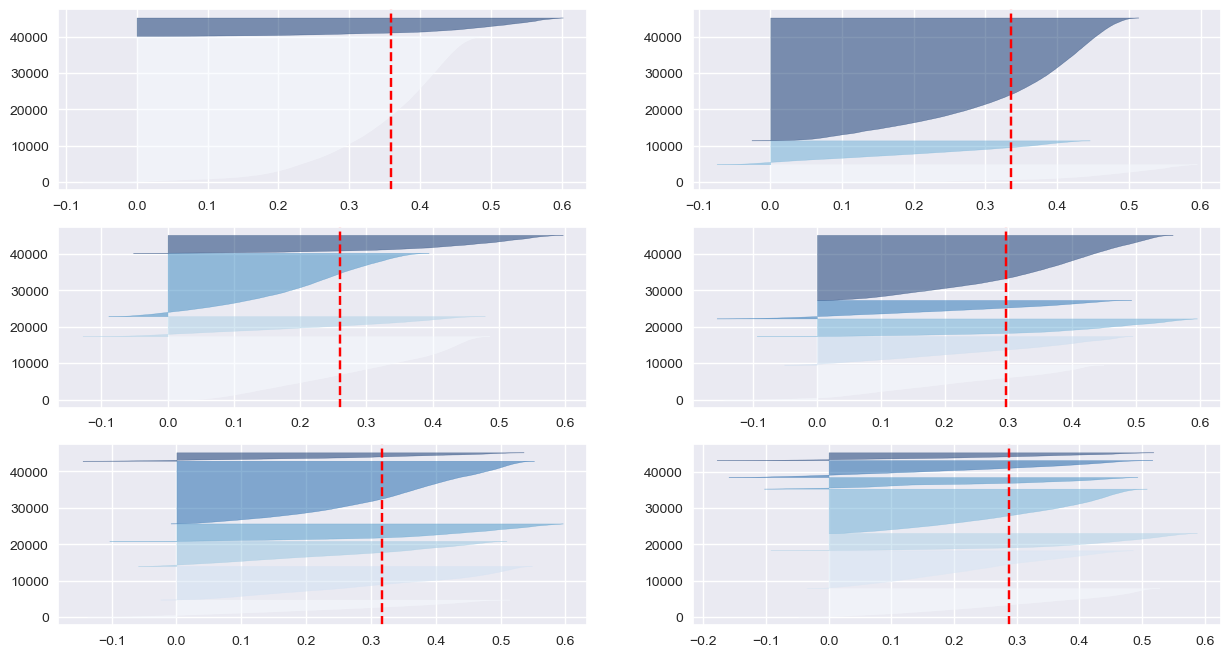

In [25]:
# --- Wyznaczenie ilości klastrów ---

# Wyznaczenie ilości klastrów za pomocą wykresu (Silhouette Score) - [uwaga: długo się kompiluje :( ]
sns.set_style("darkgrid")
fig, ax = plt.subplots(3, 2, figsize=(15, 8))
for i in range(2, 8):

    a, b = divmod(i,2)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 123)
    visualizer = SilhouetteVisualizer(kmeans, colors = 'Blues', ax = ax[a-1][b])
    visualizer.fit(X)
    
# Otrzymane wykresy obrazują jak wygląda rozmiar danych klastrów dla różnej ich ilości. Celem tej metody jest wybranie 
# takiej liczby, aby grupy były do siebie zbliżone wielkością. Spośród przedstawionych wykresów najlepiej odpowiada
# tej zasadzie wykres dla 7 klastrów - dla takiej liczby przeporwadzę klasteryzację.

In [26]:
# --- Klasteryzacja ---

# Klasteryzacja k-means z 7 klastrami
kmeans = KMeans(n_clusters= 7, init = 'k-means++', n_init=10, random_state=123)
kmeans.fit(X)

# Dodanie wyznaczonych etykiet do zbioru danych
airbnb_df_new['clusters'] = kmeans.labels_

,latitude,longitude,minimum_nights,price,number_of_reviews
clusters,,,,,
0,40.80,-73.93,3.09,96.29,9.74
1,40.73,-73.99,3.17,163.58,7.86
2,40.74,-73.96,29.23,141.10,5.66
3,40.68,-73.95,3.28,81.23,8.21
4,40.74,-73.98,3.78,380.48,9.53
5,40.72,-73.95,2.83,121.32,71.81
6,40.71,-73.81,2.49,92.26,18.96


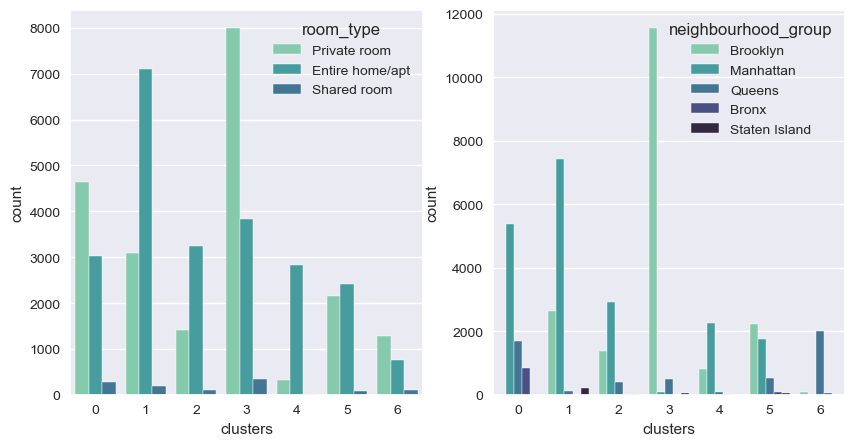

In [27]:
# --- Wizualizacja wyników --- 

# Analiza wyznaczonych klastrów

# Wartości średnie każdej z kolumn dla poszczególnych klastrów
grouped_df = airbnb_df_new.groupby(by = 'clusters').mean(numeric_only = True)
display(grouped_df)

# Wykresy sprawdzające rodzaje zameldowania i dzielnicy dla każdego klastra
palette = sns.color_palette("mako_r", 5) 

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(data = airbnb_df_new, x = "clusters", hue = "room_type", palette = palette, ax = ax[0])
sns.countplot(data = airbnb_df_new, x = "clusters", hue = "neighbourhood_group", palette = palette, ax = ax[1])
plt.show()

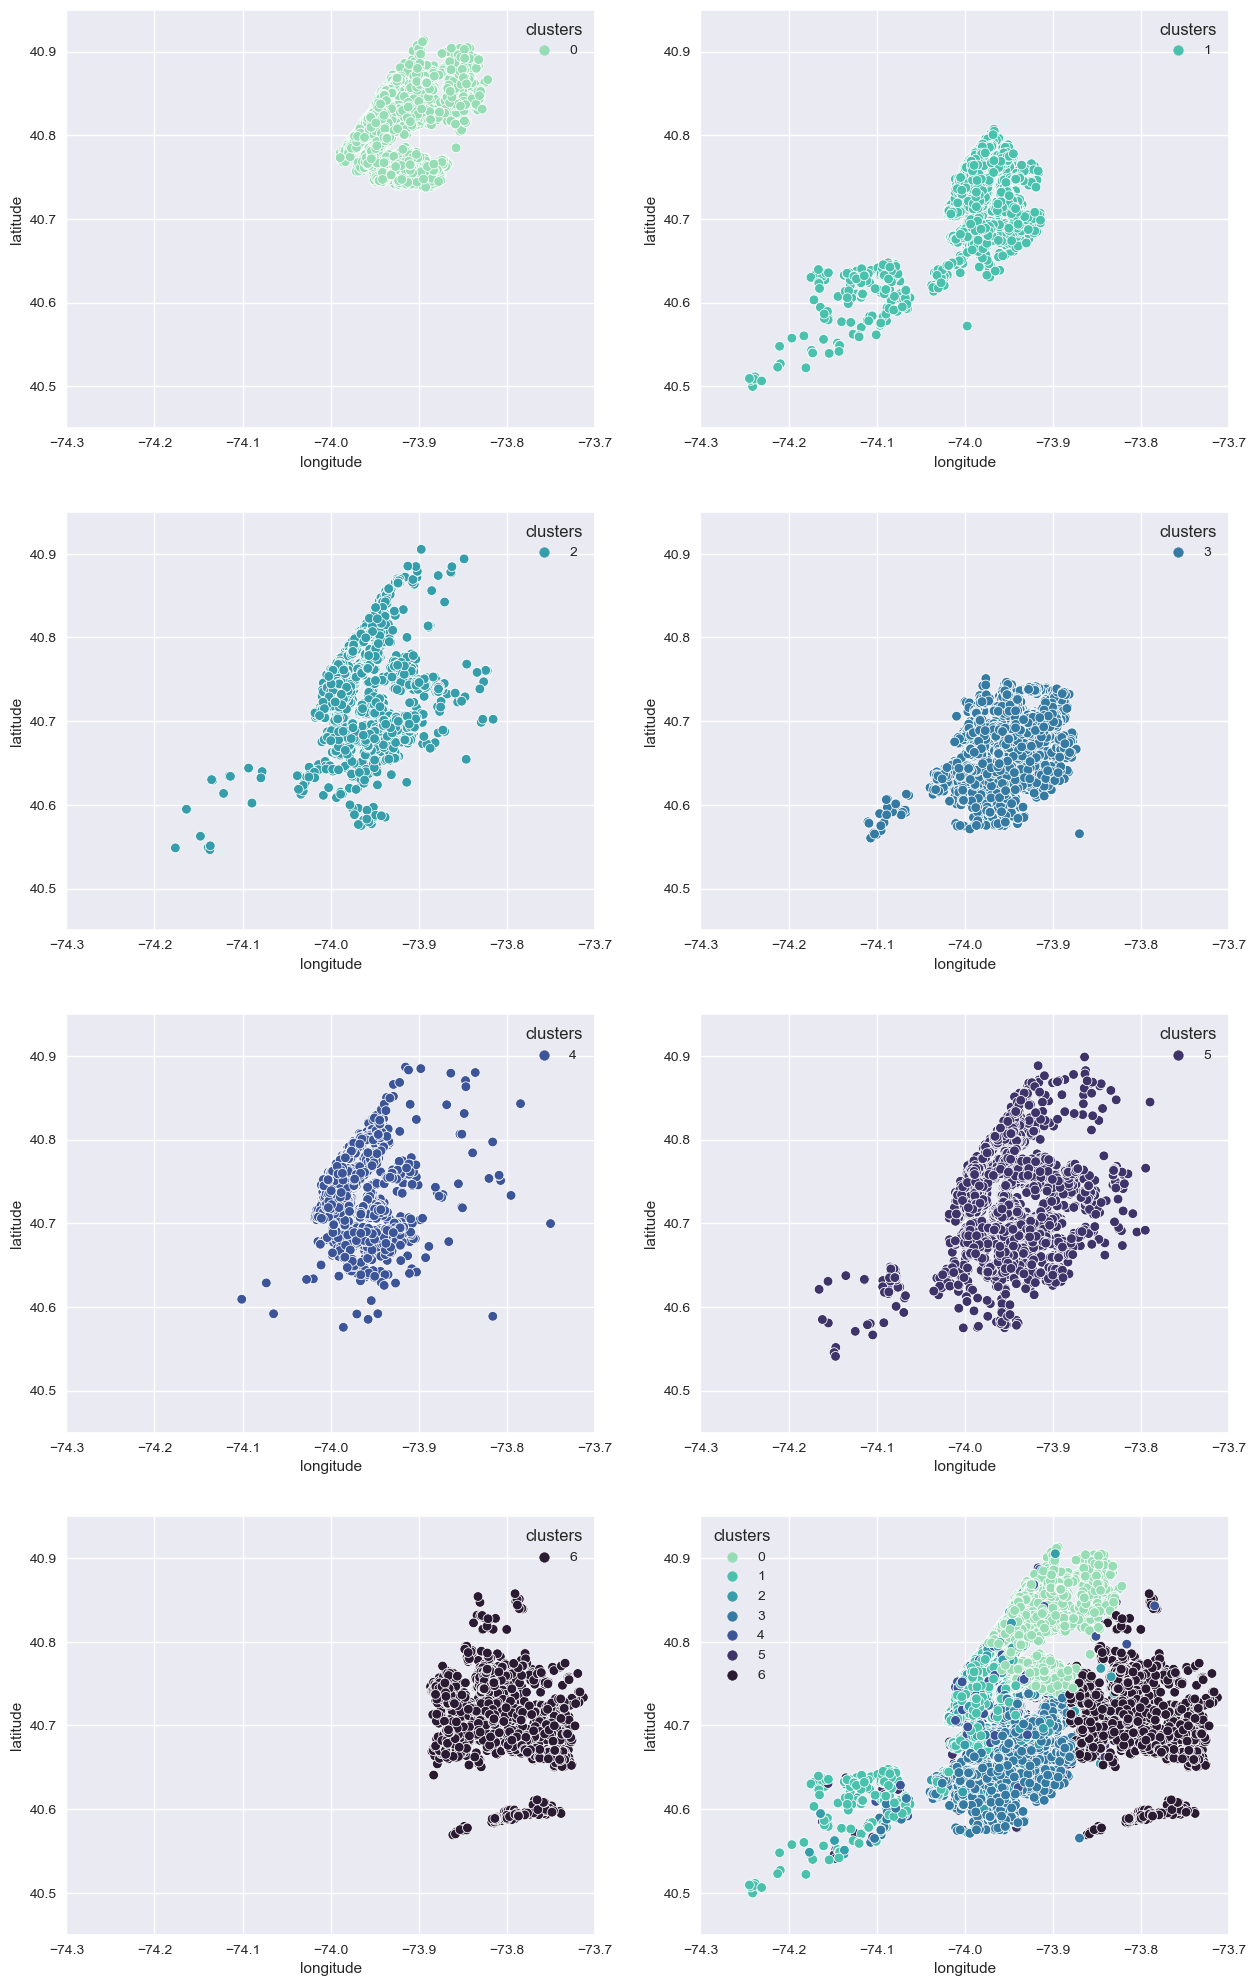

In [28]:
# --- Wizualizacja wyników --- 

# Na podstawie parametrów 'longitude' i 'latitude' wyznaczyłam położenie noclegów należacych do wybranych klastrów.

palette = sns.color_palette("mako_r", 7)
sns.set_style("darkgrid")

fig, ax = plt.subplots(4, 2, figsize = (15, 25))

# Wykresy regionów dla różnych klastrów
for i in range(0, 7):
    a, b = divmod(i,2)
    sns.scatterplot(x = 'longitude', 
                    y = 'latitude',
                    data = airbnb_df_new[airbnb_df_new['clusters'] == i],
                    hue = 'clusters',
                    ax = ax[a][b], 
                    palette = [palette[i]])
    
    ax[a][b].set_xlim([-74.3, -73.7])
    ax[a][b].set_ylim([40.45, 40.95])


# Wykres ze wszystkimi klastrami
sns.scatterplot(x = 'longitude', 
                y = 'latitude',
                data = airbnb_df_new,
                hue = 'clusters',
                ax = ax[3][1], 
                palette = palette)

ax[3][1].set_xlim([-74.3, -73.7])
ax[3][1].set_ylim([40.45, 40.95])

plt.show()